# K MEANS

## Importing libraries

In [243]:
import random
import matplotlib.pyplot as plt
import math

## Setting the variables

In [304]:
max_x_value = 100
min_x_value = 1
max_y_value = 100
min_y_value = 1

number_of_points = 500
number_of_k_points = 10
number_of_iterations = 10

## Plotting the datas

### Plotting list of points + k_points

In [305]:
def plot_list(list_of_points, list_of_k_points):
    # Blue for the points
    plt.scatter(*zip(*list_of_points), c="blue")
    
    # Red for the k_points
    if list_of_k_points!=[]:
        plt.scatter(*zip(*list_of_k_points), c="red")
    plt.show()

In [306]:
list_of_points = get_list_of_n_points(number_of_points)

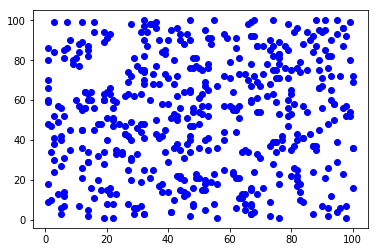

In [307]:
plot_list(list_of_points, [])

### Printing the k groups with different colors

In [308]:
def random_color():
    # Getting random RGB color
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    return color

In [309]:
def print_groups(list_of_closest, list_of_k_points):
    plt.figure(figsize=(12,12))
    
    for k_group in list_of_closest:
        # Get color
        color = random_color()
        # Plotting the points
        plt.scatter(*zip(*k_group), c=color)
    
    # Plotting the k_points
    plt.scatter(*zip(*list_of_k_points), marker='*', c="red")
    
    plt.show()

## Functions

### Get list of n random points

In [310]:
def get_list_of_n_points(n):
    l=[]
    for i in range(n):
        # Getting random between 1 and 50
        x_rand = random.randint(min_x_value,max_x_value)
        y_rand = random.randint(min_y_value,max_y_value)
        l.append((x_rand, y_rand))
    return l

### Get distance between 2 points

In [311]:
def get_distance(a, b):
    return math.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2 )

### Get the closest k_point for a specified point

In [312]:
def get_closest_k(point,list_of_k_points):
    dist = 10000
    index = 0
    i = 0
    for k_point in list_of_k_points:
        # Getting the distance
        new_d = get_distance(k_point, point) 
        
        # If distance is smaller than previously
        if (new_d < dist):
            index = i
            dist=new_d
            
        i=i+1
        
    return index

### Get closest list

In [313]:
def get_closest_list(list_of_points, list_of_k_points):
    # Creating the list of list
    list_of_closest = []
    for item in list_of_k_points:
        list_of_closest.append([])
        
    for point in list_of_points:
        # Getting the index of the closest k_point
        k_index = get_closest_k(point,list_of_k_points)
        # Adding the point to the index of the k_point
        list_of_closest[k_index].append(point)
        
    return list_of_closest

### Get centroid of list of points

In [314]:
def get_centroid(l):
    length = len(l)
    # Adding the x's
    x_coord = [p[0] for p in l]
    # Adding the y's
    y_coord = [p[1] for p in l]
    
    return (sum(x_coord)/length, sum(y_coord)/length)

### Get k new points using centroids

In [315]:
def get_new_k_points(list_of_closest):
    new_list = []
    for k_group in list_of_closest:
        # Getting centroids for each group
        new_list.append(get_centroid(k_group))
    return new_list

## Main Function

In [316]:
def k_means(iterations, k, list_of_points):
    # We create the list of k points
    list_of_k_points = get_list_of_n_points(k)
    # We plot both lists
    #plot_list(list_of_points, list_of_k_points)
    
    # We start the iterations
    for i in range(iterations):
        # Getting the list of closest
        list_of_closest = get_closest_list(list_of_points, list_of_k_points)
        # Printing groups
        #print_groups(list_of_closest, list_of_k_points)
        
        # If not last iteration
        if i<(iterations-1):
            list_of_k_points = get_new_k_points(list_of_closest)
        
    print_groups(list_of_closest, list_of_k_points)

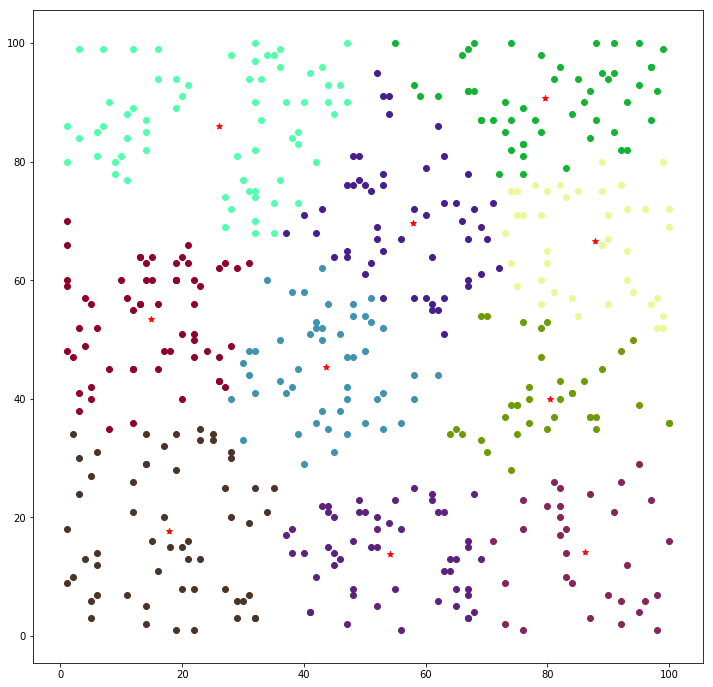

In [317]:
k_means(number_of_iterations, number_of_k_points, list_of_points)

## What could be improved ?

- Dividing by 0 when getting centroid !!
- Use better dataset to see the different groups
- Find colors with a bigger difference to make it easier to see the result